In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'E:\Machine learning project\Untitle_project\spotify_churn_dataset.csv')

In [4]:
df

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


In [7]:
print(df['is_churned'].value_counts(normalize=True))



is_churned
0    0.741125
1    0.258875
Name: proportion, dtype: float64


In [9]:
df.describe()


,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


In [10]:
df['gender'].value_counts()

gender
Male      2691
Female    2659
Other     2650
Name: count, dtype: int64

## class balance

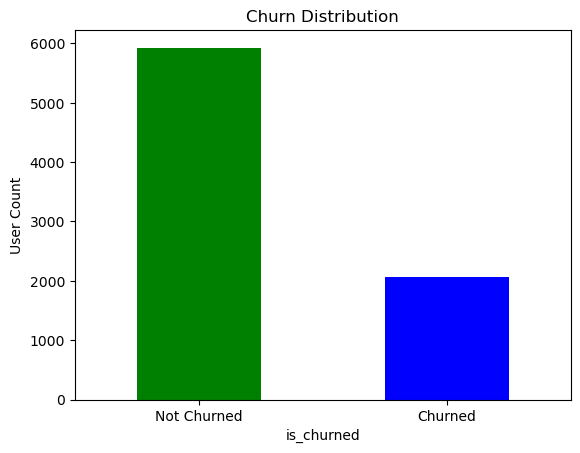

Overall churn rate: 25.89%


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn distribution
df['is_churned'].value_counts().plot(kind='bar', color=['green', 'blue'])
plt.title("Churn Distribution")
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'], rotation=0)
plt.ylabel("User Count")
plt.show()

# Optional: Percentage
churn_rate = df['is_churned'].mean() * 100
print(f"Overall churn rate: {churn_rate:.2f}%")


## 2. Churn Rate by Categorical Features

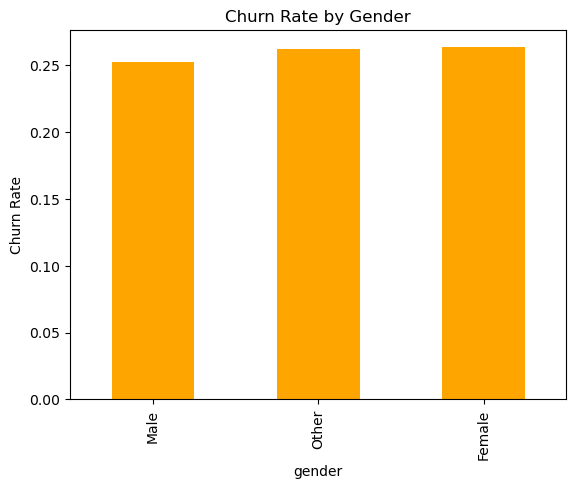

In [13]:
churn_by_gender = df.groupby('gender')['is_churned'].mean().sort_values()
churn_by_gender.plot(kind='bar', color='orange')
plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate")
plt.show()


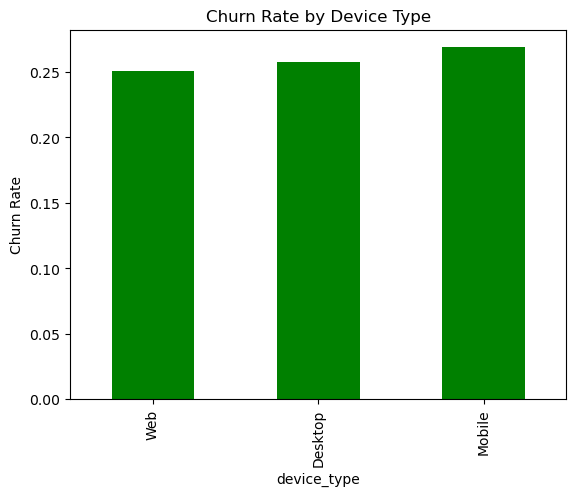

In [14]:
df.groupby('device_type')['is_churned'].mean().sort_values().plot(kind='bar', color='green')
plt.title("Churn Rate by Device Type")
plt.ylabel("Churn Rate")
plt.show()


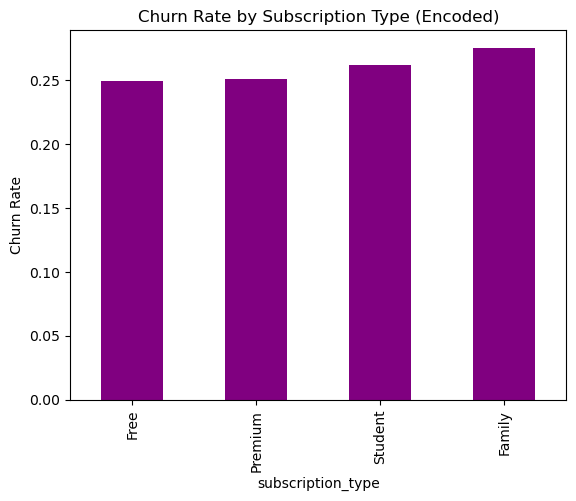

In [16]:
df.groupby('subscription_type')['is_churned'].mean().sort_values().plot(kind='bar', color='purple')
plt.title("Churn Rate by Subscription Type (Encoded)")
plt.ylabel("Churn Rate")
plt.show()


## 3. Churn by Numerical Features (Distributions)

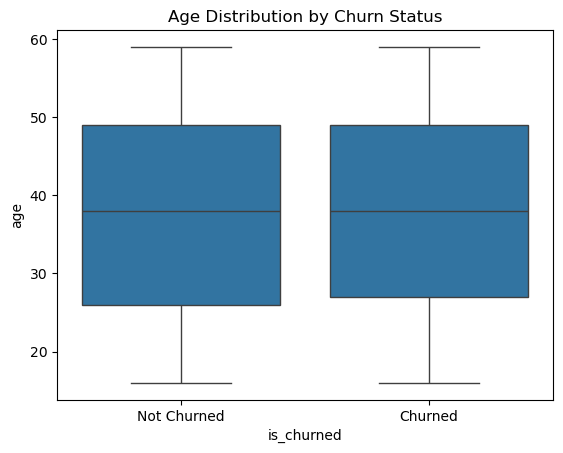

In [17]:
sns.boxplot(x='is_churned', y='age', data=df)
plt.title("Age Distribution by Churn Status")
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()


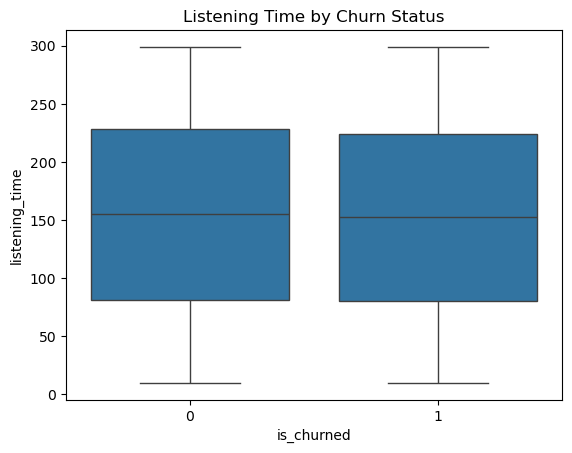

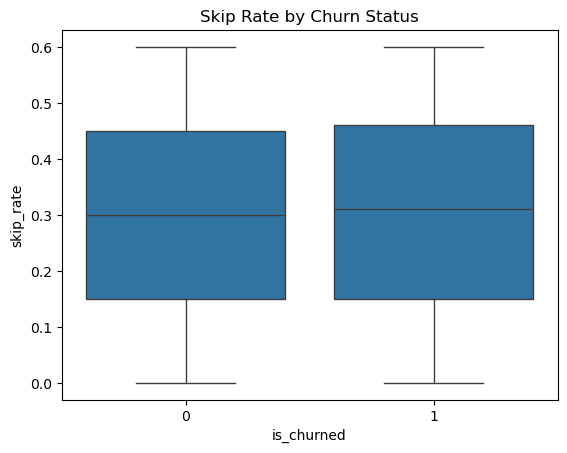

In [18]:
sns.boxplot(x='is_churned', y='listening_time', data=df)
plt.title("Listening Time by Churn Status")
plt.show()

sns.boxplot(x='is_churned', y='skip_rate', data=df)
plt.title("Skip Rate by Churn Status")
plt.show()


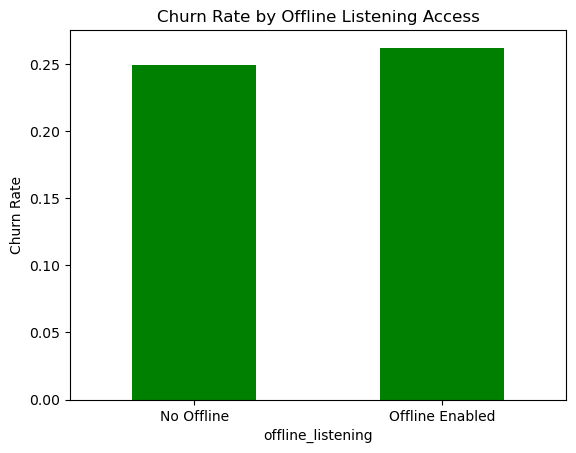

In [20]:
# Churn rate by offline listening enabled
df.groupby('offline_listening')['is_churned'].mean().plot(kind='bar', color='green')
plt.title("Churn Rate by Offline Listening Access")
plt.xticks([0, 1], ['No Offline', 'Offline Enabled'], rotation=0)
plt.ylabel("Churn Rate")
plt.show()
